<a href="https://github.com/conordewey3/HitchhikersGuideMachineLearning/blob/master/Hitchhiker's%20Guide%20to%20Machine%20Learning%20Algorithms%20in%20Python.ipynb"> ссылка </a> 


In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [359]:
from openpyxl import load_workbook

In [360]:

from sklearn import linear_model
df = pd.read_excel('C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx')
df.columns = ['X', 'Y', 'z']
df.head(10)

,X,Y,z
0,108,392.5,1
1,19,46.2,2
2,13,200.0,3
3,124,422.2,4
4,40,119.4,5
5,55,88.0,6
6,70,300.0,7
7,100,400.0,8


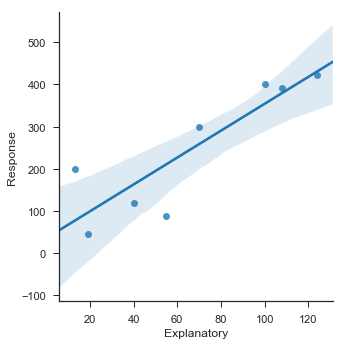

In [363]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot('X','Y', data=df)
plt.ylabel('Response')
plt.xlabel('Explanatory')

# some manipulations made with the data as a dictionary 

In [364]:
print(df['X'])
df1 = pd.DataFrame({ 'A' : 1.,
                     'B' : (df['Y']) + 10,
                     'C' : df['z'], 
                     'D' : df['X'] })
print (df1)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C    D
0  1.0  402.5  1  108
1  1.0   56.2  2   19
2  1.0  210.0  3   13
3  1.0  432.2  4  124
4  1.0  129.4  5   40
5  1.0   98.0  6   55
6  1.0  310.0  7   70
7  1.0  410.0  8  100


In [365]:
print(df['X'])

'''
l =[]
print(d)
for i in df['X']:
    i = str(i) + "_01"
    l.append(i)'''
df['X'] = [str(i) + "_01" for i in df['X']]

df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : df['Y'] + 10,
                     'C' : df['z'],
                     'D' : df['X'] })
print (df3)

0    108
1     19
2     13
3    124
4     40
5     55
6     70
7    100
Name: X, dtype: int64
     A      B  C       D
0  1.0  402.5  1  108_01
1  1.0   56.2  2   19_01
2  1.0  210.0  3   13_01
3  1.0  432.2  4  124_01
4  1.0  129.4  5   40_01
5  1.0   98.0  6   55_01
6  1.0  310.0  7   70_01
7  1.0  410.0  8  100_01


# file writing

In [366]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:\\Users\E277460\PycharmProjects\Jupyter\linear_regression_df1.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df3.to_excel(writer, sheet_name='Sheet2')


# Close the Pandas Excel writer and output the Excel file.
writer.save()


# appending data into the existing sheet

In [367]:
file2 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx'
df5 = pd.DataFrame({ 'X' : 2.,
                     'Y' : (df['Y']) + 1000 })
df5.shape[0]   ## Gives no. of rows/records  or len(df) or len(df.index)
df.shape[1]   ## Gives no. of columns
curr_count = df5.shape[0]
writer2 = pd.ExcelWriter(file2, engine='openpyxl')

df3.to_excel(writer2, index=False)    

df5.to_excel(writer2, startrow=curr_count + 1, index=False)

writer2.save()

# appending data into a new sheet of the existing file

In [368]:
file = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df2.xlsx'

df4 = pd.DataFrame({'Data': [10, 20, 30, 20, 15, 30, 45]})
book = load_workbook(file)
writer = pd.ExcelWriter(file, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

# how do I insert a column at a specific column index in pandas?
idx = 0 # using (idx = 0) will insert at the beginning
new_col = [7, 8, 9, 10, 11, 12 , 0]  # can be a list, a Series, an array or a scalar   
df4.insert(loc=idx, column='A', value=new_col)
#
df4.to_excel(writer, sheet_name='New', index=None)
writer.save()

# Займет 4 колонку в новом листе с шапкой W (значением df['Y'] + 30) и с данными исходного файла
# Но без новых (своих) индесов 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) ---> index=None

In [369]:
file3 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx'
#df6 = pd.DataFrame({ 'W' : (df['Y']) + 30 })

book = load_workbook(file3)
writer = pd.ExcelWriter(file3, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

idx = 3 # займет 4 колонку в новом листе с шапкой W и значением df['Y'] + 30 с данными исходного файла
# Но без новых (своих) индесов 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) ---> index=None
new_col = df['Y'] + 30
df.insert(loc=idx, column='W', value=new_col)

df.to_excel(writer, sheet_name='New', index=None)  # Но без новых индесов 0 1 2 3 4 5 6 7, в новом листе
writer.save()

# Займет 3 колонку (если не считать "свои-новые" индексы) в новом листе с шапкой W1 (со значениями df['Y'] + 30) и с колонкой W, с данными исходного файла
# C новыми (своими) индесами 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) нет ---> index=None

In [370]:
file4 = r'C:\\Users\E277460\PycharmProjects\Jupyter\exercise_1\linear_regression_df.xlsx'
#df6 = pd.DataFrame({ 'W' : (df['Y']) + 30 })

book = load_workbook(file4)
writer = pd.ExcelWriter(file4, engine='openpyxl')
writer.book = book # < panda will just use the writer to write the data to a new book thus overwriting the existing book if you don't specify that the book already has data

idx = 2 # займет 3 колонку (если не считать "свои-новые" индексы) в новом листе с шапкой W1 и значением df['Y'] + 30 с данными исходного файла
# C новыми (своими) индесами 0 1 2 3 4 5 6 7 , так как в df.to_excel(writer) нет ---> index=None
new_col1 = df['Y'] + 30
df.insert(loc=idx, column='W1', value=new_col1)
df.to_excel(writer)   # C новыми (со своими) индесами 0 1 2 3 4 5 6 7, в новом листе, и с колонкой W
writer.save()

In [357]:
df.head(10)

,X,Y,W1,z,W
0,108_01,392.5,422.5,1,422.5
1,19_01,46.2,76.2,2,76.2
2,13_01,200.0,230.0,3,230.0
3,124_01,422.2,452.2,4,452.2
4,40_01,119.4,149.4,5,149.4
5,55_01,88.0,118.0,6,118.0
6,70_01,300.0,330.0,7,330.0
7,100_01,400.0,430.0,8,430.0
